## Loading in, transforming, dim reduction, classification, clustering  

This one is a pain. Had to switch to python 2 so that I could use opencv on the mac 
So make sure not to save the pickle

In [2]:
from skimage.io import imread
import matplotlib.pyplot as plt
from matplotlib import pyplot
from skimage import data
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.util import img_as_ubyte
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage as ndi
from skimage.feature import shape_index
from skimage.draw import circle
import os
import pandas as pd
# !pip install cv2

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
from matplotlib import pyplot
from skimage import data
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.util import img_as_ubyte
# import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage as ndi
from skimage.feature import shape_index
from skimage.draw import circle
import os
import pandas as pd

In [3]:
root_path = '../Images/ims'
names = np.load('../Images/new_img.npy')
names_df = pd.DataFrame({'fname': names.reshape(-1,1)[:, 0]})
names_df

,fname
0,cortex_4400_4912__720_1232_110_988tile1.tiff
1,cortex_4400_4912__720_1232_110_988tile2.tiff
2,cortex_4400_4912__720_1232_110_988tile3.tiff
3,cortex_4400_4912__720_1232_110_988tile4.tiff
4,cortex_4400_4912__720_1232_110_988turn0.tiff
5,cortex_4400_4912__720_1232_110_988turn1.tiff
6,cortex_4400_4912__720_1232_110_988turn2.tiff
7,cortex_4400_4912__720_1232_110_988turn3.tiff
8,cortex_4400_4912__720_1232_110_988turn4.tiff
9,cortex_4400_4912__720_1232_110_988turn5.tiff


In [4]:

#UPDATE THE DATAFRAME TO HAVE MANIPULATED FILES /CROPPED AND ROTATED
df = pd.read_pickle("DataSet_V4.pkl")

df['fname'] = (df['fname'].str.replace(r'images/',''))
new_df = pd.merge(names_df, df , how="outer")
# new_df[new_df['fname'].str.contains("thalamus_650_1162__600_1112_159_996")] #sanity check passed

In [5]:
df = pd.read_pickle("DataSet_V5.pkl")
# df.to_pickle("DataSet_v5_prot3.pkl", protocol=2)

In [3]:
# import managers
# df = pd.read_pickle("DataSet_v5_prot3.pkl")

ImportError: No module named managers

In [158]:
## NOW GET THE LABELS IN FOR EACH OF THE NEW IMAGES. AS TRAIN AND TEST AND AS THE CLASS ITSELF
new_df['class'] = np.nan
new_df['class'] = np.where(new_df['fname'].str.contains("thalamus"), 1, new_df['class'])
new_df['class'] = np.where(new_df['fname'].str.contains("cortex"), 2, new_df['class'])
new_df['class'] = np.where(new_df['fname'].str.contains("str"), 3, new_df['class'])
new_df['class'] = new_df['class'].astype(int, inplace=True)


In [171]:
new_df['train'] = 0
new_df['test'] = 0

In [172]:
# NOW LOOP THROUGH DIRECTORY AND ADD IF TRAIN OR TEST. 
# FOR EACH FILE IN ___. IF FNAME IS IN FNAME, ADD TRAIN

#TRAIN LOOP
a = os.listdir(root_path)

for direct in a:
    
    if "train" in direct: 
        fnames = os.listdir(root_path + '/' + direct)
        mask = new_df['fname'].isin(fnames)
        print(direct,sum(mask))
        new_df['train'] = np.where(mask, 1, new_df['train']).astype(int)
        
    if "test" in direct:
        fnames = os.listdir(root_path + '/' + direct)
        mask = new_df['fname'].isin(fnames)
        print("test", direct, sum(mask))
        new_df['test'] = np.where(mask, 1, new_df['test']).astype(int)

test cortex_test 14336
cortex_train 14336
test striatum_test 14336
striatum_train 14336
test thalamus_test 14336
thalamus_train 14336


In [220]:
new_df.head(10)

,fname,Entropy Mean,Entropy Variance,Entropy Sum,label,Number of Events,Max Area,Average Area,Avg % Diff Width Height,Max % Diff Width Height,Shape Index Mean,Shape Index Variance,Shape Index Sum,Pixel Intensity Mean,Pixel Intensity Variance,Pixel Intensity Sum,class,train,test
0,cortex_4400_4912__720_1232_110_988tile1.tiff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
1,cortex_4400_4912__720_1232_110_988tile2.tiff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
2,cortex_4400_4912__720_1232_110_988tile3.tiff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
3,cortex_4400_4912__720_1232_110_988tile4.tiff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
4,cortex_4400_4912__720_1232_110_988turn0.tiff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
5,cortex_4400_4912__720_1232_110_988turn1.tiff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
6,cortex_4400_4912__720_1232_110_988turn2.tiff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
7,cortex_4400_4912__720_1232_110_988turn3.tiff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
8,cortex_4400_4912__720_1232_110_988turn4.tiff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
9,cortex_4400_4912__720_1232_110_988turn5.tiff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0


In [218]:
test_df = new_df[new_df['test'] == 1]
test_df = test_df[test_df['train'] == 1]
print(test_df.shape)

train_df = new_df[new_df['test'] == 0]
train_df = train_df[train_df['train'] == 0]
print("num of original images", train_df.shape)

train_df = new_df[new_df['test'] == 1]
train_df = train_df[train_df['train'] == 0]
print("number of testing images", train_df.shape)

train_df = new_df[new_df['test'] == 0]
train_df = train_df[train_df['train'] == 1]
print("Numer of training images", train_df.shape)
# new_df
print("These sum to ", 6144 + 2*43008, " matches size of df ", new_df.shape)

(0, 19)
num of original images (6144, 19)
number of testing images (43008, 19)
Numer of training images (43008, 19)
These sum to  92160  matches size of df  (92160, 19)


In [221]:
# new_df.describe()

In [8]:
df.head()
df.to_csv('dataset_v5.csv', index=False)

In [5]:
new_df = pd.read_csv('./dataset_v5.csv')
new_df

,fname,Entropy Mean,Entropy Variance,Entropy Sum,label,Number of Events,Max Area,Average Area,Avg % Diff Width Height,Max % Diff Width Height,Shape Index Mean,Shape Index Variance,Shape Index Sum,Pixel Intensity Mean,Pixel Intensity Variance,Pixel Intensity Sum,class,train,test
0,cortex_4400_4912__720_1232_110_988tile1.tiff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
1,cortex_4400_4912__720_1232_110_988tile2.tiff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
2,cortex_4400_4912__720_1232_110_988tile3.tiff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
3,cortex_4400_4912__720_1232_110_988tile4.tiff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
4,cortex_4400_4912__720_1232_110_988turn0.tiff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
5,cortex_4400_4912__720_1232_110_988turn1.tiff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
6,cortex_4400_4912__720_1232_110_988turn2.tiff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
7,cortex_4400_4912__720_1232_110_988turn3.tiff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
8,cortex_4400_4912__720_1232_110_988turn4.tiff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
9,cortex_4400_4912__720_1232_110_988turn5.tiff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0


In [10]:
from PIL import Image

## Now compute the features for each canny 

In [27]:
a = os.listdir(root_path)
print(a)
df_canny = pd.DataFrame(columns=['File Name', 'Number of Events', 'Max Area', 'Average Area','Avg % Diff Width Height', 'Max % Diff Width Height'])
for direct in a:
    if ("train" in direct) or ("test" in direct): 
        
        fnames = os.listdir(root_path + '/' + direct)
        count = 0
        for fname in fnames: 
            fname = root_path + '/' + direct + '/' + fname
#             im = cv2.imread(fname, np.float32)
            print(fname)
#             im = cv2.imread(fname)
            im = Image.open(fname)
            im = np.array(im) # turn into np array
            print(im.shape)
            np.save('file.npy', im)
            im = np.load('file.npy')
            print(im.shape)
            print(im)
            im = im.astype('uint8')
#             im = cv2.imread('file.npy')
            
            print(im)
            
            if count == 10: 
                break
            count += 1

            im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
            im = cv2.blur(im,(6,3))
            im = cv2.Canny(im, 90, 300)



            mask = cv2.inRange(im, 100, 255)
            kernel = np.ones((5, 5), np.uint8)
            # Erode / dilate to make label appear "boxy"
            boxy = cv2.erode(mask, kernel, iterations=0)
            boxy = cv2.dilate(boxy, kernel, iterations=1)
            ##Create the boxes
            contours, _ = cv2.findContours(boxy, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            width_list = []
            height_list = []
            frequency_list = []
            perc_diff_w_h_list = [] ## is does is have an height width ratio of a square? So spherical
            area_list = []
            # or not. so eliptical
            # so take percent diff width and height
        #     print(areas)

            for contour in contours:
                cv2.drawContours(im, contour, -1, (0, 255, 0), 3)
                boundRect = cv2.boundingRect(contour)
                color = (180, 180, 180)
                cv2.rectangle(boxy, (int(boundRect[0]), int(boundRect[1])), 
                (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), color, 2)
                cv2.rectangle(im, (int(boundRect[0]), int(boundRect[1])), 
                (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), color, 2)

                width = boundRect[2]
                height= boundRect[3]
                width_list.append(width)
                height_list.append(height)
                perc_diff_w_h_list.append(np.abs(width - height) / ((width + height) /2))

                area_list.append(width * height)

            max_area = max(area_list)
            average_area = sum(area_list) / len(area_list)
            avg_perc_diff_w_h = sum(perc_diff_w_h_list) / len(perc_diff_w_h_list)
            max_perc_diff_w_h = max(perc_diff_w_h_list)


            elements = len(width_list)
            s2 = pd.Series([image, elements, max_area, average_area, avg_perc_diff_w_h, max_perc_diff_w_h], index=['File Name', 'Number of Events', 'Max Area', 
                                                                                            'Average Area','Avg % Diff Width Height', 'Max % Diff Width Height'])
            df_canny = df_canny.append(s2, ignore_index=True)
        


['.DS_Store', 'cortex_test', 'cortex_train', 'striatum_test', 'striatum_train', 'thalamus_test', 'thalamus_train']
../Images/ims/cortex_test/cortex_4400_4912__720_1232_159_0tile1.tiff
(64, 64)
(64, 64)
[[131 129 134 ... 120 120 118]
 [119 117 116 ... 113 113 113]
 [112 106 104 ... 111 112 111]
 ...
 [109 115 119 ... 112  98  98]
 [137 122 114 ... 104  95 100]
 [155 125 112 ... 105 101 106]]
[[131 129 134 ... 120 120 118]
 [119 117 116 ... 113 113 113]
 [112 106 104 ... 111 112 111]
 ...
 [109 115 119 ... 112  98  98]
 [137 122 114 ... 104  95 100]
 [155 125 112 ... 105 101 106]]


error: OpenCV(3.4.4) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.hpp:255: error: (-2:Unspecified error) in function 'cv::CvtHelper<cv::Set<3, 4, -1>, cv::Set<3, 4, -1>, cv::Set<0, 2, 5>, cv::SizePolicy::NONE>::CvtHelper(InputArray, OutputArray, int) [VScn = cv::Set<3, 4, -1>, VDcn = cv::Set<3, 4, -1>, VDepth = cv::Set<0, 2, 5>, sizePolicy = cv::SizePolicy::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [2]:
import os

In [3]:
a = os.listdir(root_path)

for direct in a:
    if "train" in direct: 
        fnames = os.listdir(root_path + '/' + direct)
        mask = new_df['fname'].isin(fnames)
        print(direct,sum(mask))
        new_df['train'] = np.where(mask, 1, new_df['train']).astype(int)
        
    if "test" in direct:
        fnames = os.listdir(root_path + '/' + direct)
        mask = new_df['fname'].isin(fnames)
        print("test", direct, sum(mask))
        new_df['test'] = np.where(mask, 1, new_df['test']).astype(int)







images = [x for x in os.listdir("../Images/Edge/train/") if ".npy" in x]
# images = ['/Users/heatherwhittaker/Documents/2019_Fall_Semester/COE/FinalProject/Images/Raw/thalamus_650_1162__600_1112_110']
# images = ['../Images/Edge/train/thalamus_650_1162__600_1112_159_989.npy']
# print(os.listdir("../Images/Edge/train/"))



# 'File Name', 'Number of Events', 'Max Area', 'Average Area','Avg % Diff Width Height', 'Max % Diff Width Height'
df_canny = pd.DataFrame(columns=['File Name', 'Number of Events', 'Max Area', 'Average Area','Avg % Diff Width Height', 'Max % Diff Width Height'])

for image in images:
    filename = "../Images/Edge/train/" + str(image)
    

#     print(filename)
    im = np.load(filename)
#     print(a.shape)
#     im = cv2.imread(a, np.float32)
    
#     im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#     im = cv2.blur(im,(6,3))
#     im = cv2.Canny(im, 90, 300) # already done
#     print(im)

    mask = cv2.inRange(im, 100, 255)
    kernel = np.ones((5, 5), np.uint8)
    # Erode / dilate to make label appear "boxy"
    boxy = cv2.erode(mask, kernel, iterations=0)
    boxy = cv2.dilate(boxy, kernel, iterations=1)
    ##Create the boxes
    contours, _ = cv2.findContours(boxy, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    width_list = []
    height_list = []
    frequency_list = []
    perc_diff_w_h_list = [] ## is does is have an height width ratio of a square? So spherical
    area_list = []
    # or not. so eliptical
    # so take percent diff width and height
#     print(areas)
    
    for contour in contours:
        cv2.drawContours(im, contour, -1, (0, 255, 0), 3)
        boundRect = cv2.boundingRect(contour)
        color = (180, 180, 180)
        cv2.rectangle(boxy, (int(boundRect[0]), int(boundRect[1])), 
        (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), color, 2)
        cv2.rectangle(im, (int(boundRect[0]), int(boundRect[1])), 
        (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), color, 2)
        
        width = boundRect[2]
        height= boundRect[3]
        width_list.append(width)
        height_list.append(height)
        perc_diff_w_h_list.append(np.abs(width - height) / ((width + height) /2))
        
        area_list.append(width * height)
        
    max_area = max(area_list)
    average_area = sum(area_list) / len(area_list)
    avg_perc_diff_w_h = sum(perc_diff_w_h_list) / len(perc_diff_w_h_list)
    max_perc_diff_w_h = max(perc_diff_w_h_list)
    
       
    elements = len(width_list)
    s2 = pd.Series([image, elements, max_area, average_area, avg_perc_diff_w_h, max_perc_diff_w_h], index=['File Name', 'Number of Events', 'Max Area', 
                                                                                    'Average Area','Avg % Diff Width Height', 'Max % Diff Width Height'])
    df_canny = df_canny.append(s2, ignore_index=True)
    ## to show a bounding box
    

    
    

NameError: name 'root_path' is not defined

## Fix the train test split

In [183]:
im_test = np.load('../Images/numpylabels/feature_test.npy')
im_train = np.load('../Images/numpylabels/feature_train.npy')
im_labels_test = np.load('../Images/numpylabels/labels_test.npy')
im_labels_train = np.load('../Images/numpylabels/labels_train.npy')

In [199]:
all_ims = np.hstack((im_test, im_train))
all_labels = np.hstack((im_labels_test, im_labels_train))


In [200]:
print(all_labels.shape, all_ims.shape)

(6606,) (6606,)


### Now

# IGNORE AFTER HERE

In [219]:
new_df.to_pickle("DataSet_v5.pkl")

### Load in images

In [109]:
root_path = '../Images'


# v0 = imread('img_3550_4062__320_832__0.tiff') #slice 0, striatum
# img_650_1162__600_1112__49.tiff
# v1 = imread('img_3550_4062__320_832__49.tiff') #slice 49, striatum
# v2 = imread('img_650_1162__600_1112__0.tiff') #slice 0, hypothalamus
fname = (root_path + '/Raw/img_650_1162__600_1112__49.tiff')

v3 = imread(fname) #slice 49, hyppothalamus

FileNotFoundError: [Errno 2] No such file or directory: '/Users/heatherwhittaker/Documents/2019_Fall_Semester/COE/FinalProject/Images/Raw/img_650_1162__600_1112__49.tiff'

In [6]:
# fname.rsplit(".",1)[0].rsplit('/',1)[0]
root_path = '../Images'

### Entropy

In [102]:
# image = img_as_ubyte(data.camera())
#image = pyplot.imread('plot_entropy_1.png')
#image = img_as_ubyte(image)

# image = v0
image = v3
entropy_img = entropy(image,disk(5))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(20, 8))

img0 = ax0.imshow(image, cmap=plt.cm.gray)
ax0.set_title('Image', fontsize=25)
ax0.axis('off')
fig.colorbar(img0, ax=ax0)

#img1 = ax1.imshow(entropy(image, disk(5)), cmap=plt.cm.jet)
img1 = ax1.imshow(entropy_img, cmap=plt.cm.jet)
ax1.set_title('Entropy', fontsize=25)
ax1.axis('off')
fig.colorbar(img1, ax=ax1)

plt.show()

NameError: name 'v3' is not defined

In [187]:
for i, fname in enumerate(im_names_test):
    image = imread(root_path + '/Raw/all/' + fname)
    entropy_img = entropy(image,disk(5))
    np.save(root_path + '/Entropy/test/' + fname.rsplit(".",1)[0].rsplit('/',1)[0], entropy_img)
    
# for i, fname in enumerate(im_names_train):
#     image = imread(fname)
#     entropy_img = entropy(image,disk(5))
#     np.save(root_path + '/Entropy/train' + fname.rsplit(".",1)[0].rsplit('/',1)[0], entropy_img)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/heatherwhittaker/Documents/2019_Fall_Semester/COE/FinalProject/Images/Raw/all/thalamus_650_1162__600_1112_159_155.tiff'

In [188]:
## get the training data

In [189]:



def compute_save_entropy():
    new_root = root_path + '/Raw/'
    np.save(root_path + '/Entropy/train/' + 'train_labels.npy', im_labels_train)  
    np.save(root_path + '/Entropy/test/' + 'test_labels.npy', im_labels_test)  

    # for each file, check each directory and read in the image
    # compute entropy then save the image to the Entropy train directory
    for fname in im_train: 
        for i in (os.listdir(new_root)):
            if not i.startswith('.DS'):
                if fname in os.listdir(new_root  + i + '/images/'):
                    image = imread(root_path + '/Raw/' + i + '/images/' + fname)
                    entropy_img = entropy(image,disk(5))
                    new_fname = (root_path + '/Entropy/train/' + fname.rsplit(".",1)[0].rsplit('/',1)[0])
                    np.save(new_fname + '.npy', entropy_img)
    
    for fname in im_test: 
        for i in (os.listdir(new_root)):
            if not i.startswith('.DS'):
                if fname in os.listdir(new_root  + i + '/images/'):
                    image = imread(root_path + '/Raw/' + i + '/images/' + fname)
                    entropy_img = entropy(image,disk(5))
                    new_fname = (root_path + '/Entropy/test/' + fname.rsplit(".",1)[0].rsplit('/',1)[0])
                    np.save(new_fname + '.npy', entropy_img)
    
    
compute_save_entropy()


In [98]:
def validate_save_entropy():
    print(root_path + '/Entropy/train/')
    img = np.load(root_path + '/Entropy/train/'+ os.listdir(root_path + '/Entropy/train/')[4])
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))
    ax1.axis('off')
    ax1.imshow(img)
    plt.rc('image', cmap='gray')
                          
validate_save_entropy() 

SyntaxError: invalid syntax (<ipython-input-98-58d119d72f27>, line 4)

In [81]:
im = im_test[0]
print(im.shape)
im
# entropy_img_test = entropy(im,disk(5))
# for i, im in enumerate(im_test):
#     if i != 0:
#         entropy_img = entropy(im,disk(5))
    
    
    



()


'thalamus_650_1162__600_1112_159_155.tiff'

In [191]:
# plt.imsave('../Images/Entropy/name.png', entropy_img)y
np.save(root_path + './npArrays/Entropy/entropy_feat_train.npy' , entropy_img_train)
np.save(root_path + './npArrays/Entropy/entropy_labels_train.npy' , im_labels_train)
np.save(root_path + './npArrays/Entropy/entropy_feat_test.npy' , entropy_img_test)
np.save(root_path + './npArrays/Entropy/entropy_labels_test.npy' , im_labels_test)


NameError: name 'entropy_img_train' is not defined

### Edge Magnitude

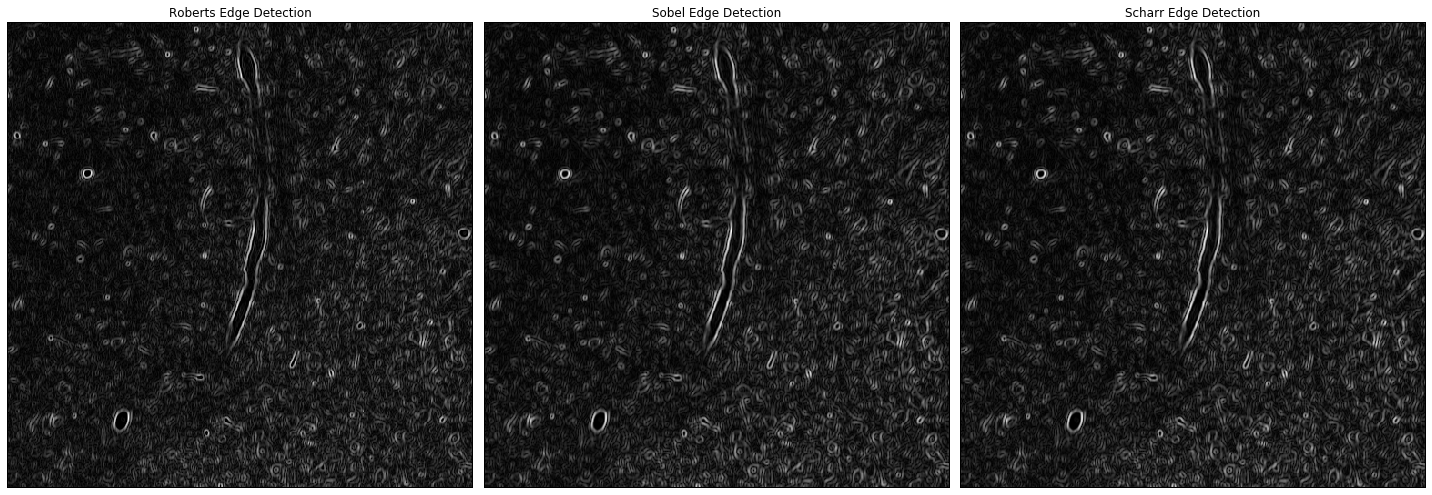

In [42]:
from skimage.filters import roberts, sobel, sobel_h, sobel_v, scharr

edge_roberts = roberts(image)
edge_sobel = sobel(image)
edge_scharr = scharr(image)

fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(20,8))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

ax[2].imshow(edge_scharr, cmap=plt.cm.gray)
ax[2].set_title('Scharr Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()
plt.imsave('../Images/PosterImgs/edge_mag.png', display)

In [ ]:
for i, fname in fnames:
    entropy_img = entropy(image,disk(5))
    np.save(root_path + 'Entropy' + fname, entropy_img)

## Canny Edge Detection  

Blur first then edge detect. 

In [40]:
im = cv2.imread('../Images/Raw/img_650_1162__600_1112__49.tiff')
RGB_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
img = cv2.blur(RGB_img,(3,3))
display = cv2.Canny(img, 90, 300)

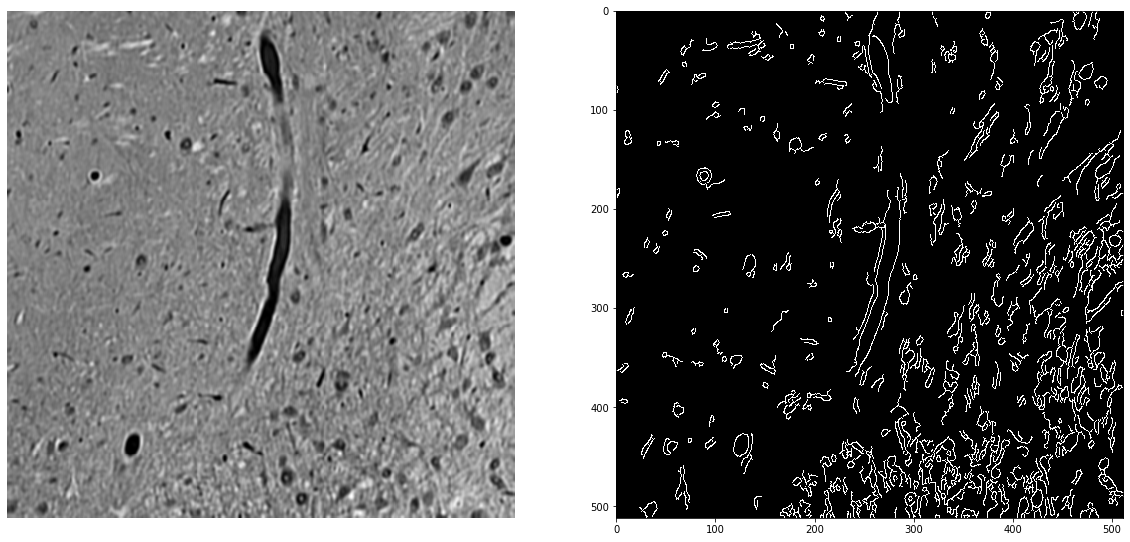

In [41]:
display = cv2.Canny(img, 90, 300)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))
ax1.axis('off')
ax1.imshow(img)
plt.rc('image', cmap='gray')
ax2.imshow(display)
plt.imsave('../Images/PosterImgs/cannny_edge.png', display)

In [192]:
def compute_save_canny_edge():
    new_root = root_path + '/Raw/'
    np.save(root_path + '/Edge/train/' + 'train_labels.npy', im_labels_train)  
    np.save(root_path + '/Edge/test/' + 'test_labels.npy', im_labels_test)  

    # for each file, check each directory and read in the image
    # compute entropy then save the image to the Entropy train directory
    for fname in im_train: 
        for i in (os.listdir(new_root)):
            if not i.startswith('.DS'):
                if fname in os.listdir(new_root  + i + '/images/'):
                    im = cv2.imread(root_path + '/Raw/' + i + '/images/' + fname)
                    RGB_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
                    img = cv2.blur(RGB_img,(3,3))
                    display = cv2.Canny(img, 90, 300)
                    new_fname = (root_path + '/Edge/train/' + fname.rsplit(".",1)[0].rsplit('/',1)[0])
                    np.save(new_fname + '.npy', display)
    for fname in im_test: 
        for i in (os.listdir(new_root)):
            if not i.startswith('.DS'):
                if fname in os.listdir(new_root  + i + '/images/'):
                    im = cv2.imread(root_path + '/Raw/' + i + '/images/' + fname)
                    RGB_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
                    img = cv2.blur(RGB_img,(3,3))
                    display = cv2.Canny(img, 90, 300)
                    new_fname = (root_path + '/Edge/test/' + fname.rsplit(".",1)[0].rsplit('/',1)[0])
                    np.save(new_fname + '.npy', display)
                                  
                    
                    
def validate_canny_edge():
    print(root_path + '/Edge/train/')
    img = np.load(root_path + '/Edge/train/'+ os.listdir(root_path + '/Edge/train/')[4])
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))
    ax1.axis('off')
    ax1.imshow(img)
    plt.rc('image', cmap='gray')
                          
compute_save_canny_edge()                                   


../Images/Edge/train/
../Images


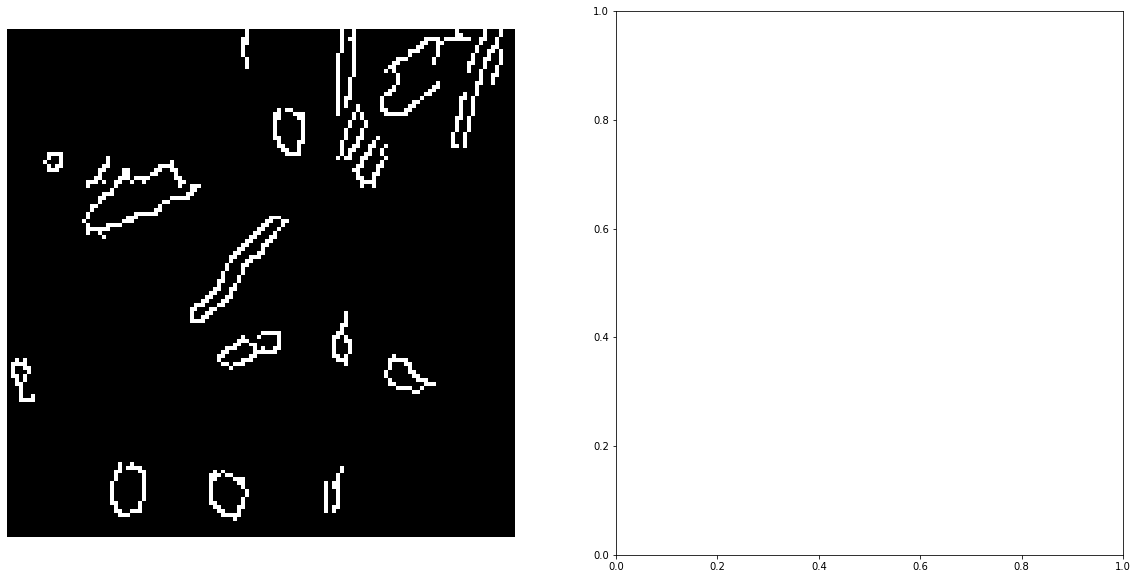

In [194]:
validate_canny_edge()
print(root_path)

### Shape Index

In [101]:
s = shape_index(image)
s_smooth = ndi.gaussian_filter(s, sigma=0.3)

target = 1; delta = 0.05

point_y, point_x = np.where(np.abs(s - target) < delta)
point_z = image[point_y, point_x]

# The shape index map relentlessly produces the shape, even that of noise.
# In order to reduce the impact of noise, we apply a Gaussian filter to it,
# and show the results once in

# s_smooth = ndi.gaussian_filter(s, sigma=0.3)


######### Plotting

point_y_s, point_x_s = np.where(np.abs(s_smooth - target) < delta)
point_z_s = image[point_y_s, point_x_s]

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(1, 3, 1)

ax1.imshow(image, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Input image', fontsize=20)

scatter_settings = dict(alpha=0.75, s=10, linewidths=0)

ax1.scatter(point_x, point_y, color='blue', **scatter_settings)
ax1.scatter(point_x_s, point_y_s, color='green', **scatter_settings)

ax2 = fig.add_subplot(1, 3, 2, projection='3d', sharex=ax1, sharey=ax1)

x, y = np.meshgrid(np.arange(0, image.shape[0], 1),np.arange(0, image.shape[1], 1))

ax2.plot_surface(x, y, image, linewidth=0, alpha=0.5)

ax2.scatter(point_x,point_y,point_z,
    color='blue',label='$|s - 1|<0.05$',**scatter_settings)

ax2.scatter(point_x_s, point_y_s, point_z_s, color='green', label='$|s\' - 1|<0.05$',
    **scatter_settings)

ax2.legend(loc='lower left')
ax2.axis('off'); ax2.set_title('3D visualization', fontsize=20)

ax3 = fig.add_subplot(1, 3, 3, sharex=ax1, sharey=ax1)

ax3.imshow(s_smooth, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Shape index, $\sigma=1$',fontsize=20)

fig.tight_layout()
plt.show()
plt.imsave('../Images/PosterImgs/shape_idx1.png', image)

ValueError: Can not convert from <U40 to float64.

In [ ]:
for i, fname in enumerate(im_names_test):
    im = imread(fname)
    s = shape_index(image)
    s_smooth = ndi.gaussian_filter(s, sigma=0.3)
    np.save(root_path + '/ShapeIndex/test/' + fname.rsplit(".",1)[0].rsplit('/',1)[0], s_smooth)
    
for i, fname in enumerate(im_names_train):
    im = cv2.imread('../Images/Raw/img_650_1162__600_1112__49.tiff')
    RGB_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    img = cv2.blur(RGB_img,(3,3))
    display = cv2.Canny(img, 90, 300)
    np.save(root_path + '/ShapeIndex/train' + fname.rsplit(".",1)[0].rsplit('/',1)[0], s_smooth)

In [178]:
def compute_save_shape():
    new_root = root_path + '/Raw/'
    np.save(root_path + '/ShapeIndex/train/' + 'train_labels.npy', im_labels_train)  
    np.save(root_path + '/ShapeIndex/test/' + 'test_labels.npy', im_labels_test)  

    # for each file, check each directory and read in the image
    # compute entropy then save the image to the Entropy train directory
    for fname in im_train: 
        for i in (os.listdir(new_root)):
            if not i.startswith('.DS'):
                if fname in os.listdir(new_root  + i + '/images/'):
                    im = imread(new_root  + i + '/images/' + fname)
                    s = shape_index(image)
                    s_smooth = ndi.gaussian_filter(s, sigma=0.3)
                    new_fname = (root_path + '/ShapeIndex/train/' + fname.rsplit(".",1)[0].rsplit('/',1)[0])
                    np.save(new_fname + '.npy', s_smooth)
    for fname in im_test: 
        for i in (os.listdir(new_root)):
            if not i.startswith('.DS'):
                if fname in os.listdir(new_root  + i + '/images/'):
                    im = imread(new_root  + i + '/images/' + fname)
                    s = shape_index(image)
                    s_smooth = ndi.gaussian_filter(s, sigma=0.3)
                    new_fname = (root_path + '/ShapeIndex/test/' + fname.rsplit(".",1)[0].rsplit('/',1)[0])
                    np.save(new_fname + '.npy', s_smooth)
                    
                    
def validate_save_shape():
    print(root_path + '/ShapeIndex/train/')
    img = np.load(root_path + '/ShapeIndex/train/'+ os.listdir(root_path + '/ShapeIndex/train/')[4])
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))
    ax1.axis('off')
    ax1.imshow(img)
    plt.rc('image', cmap='gray')
                          
compute_save_shape() 


../Images/ShapeIndex/train/


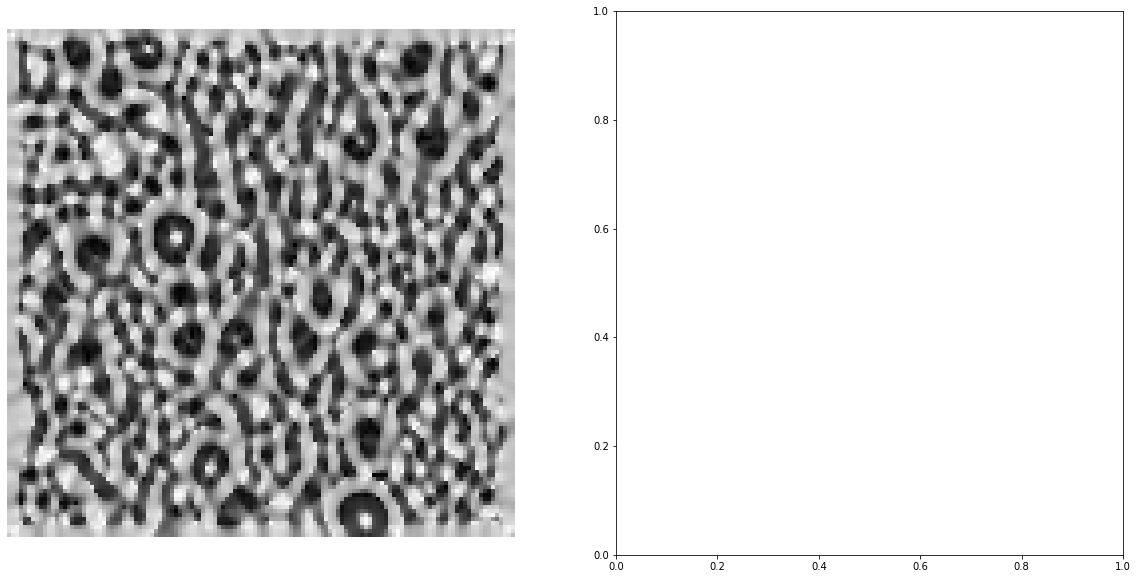

In [179]:
validate_save_shape()

NameError: name 'new_root' is not defined

# Get features for each of the transforms

For each of the canny edge transforms:  
Get the bounding boxes. return in a dataframe :
count, max area, average area, max percent difference width and height (how square -- ex a sphere will approximate a square), min percent difference width and height 



In [164]:
images = [x for x in os.listdir("../Images/Edge/train/") if ".npy" in x]
# images = ['/Users/heatherwhittaker/Documents/2019_Fall_Semester/COE/FinalProject/Images/Raw/thalamus_650_1162__600_1112_110']
# images = ['../Images/Edge/train/thalamus_650_1162__600_1112_159_989.npy']
# print(os.listdir("../Images/Edge/train/"))



# 'File Name', 'Number of Events', 'Max Area', 'Average Area','Avg % Diff Width Height', 'Max % Diff Width Height'
df_canny = pd.DataFrame(columns=['File Name', 'Number of Events', 'Max Area', 'Average Area','Avg % Diff Width Height', 'Max % Diff Width Height'])
for image in images:
    filename = "../Images/Edge/train/" + str(image)
    

#     print(filename)
    im = np.load(filename)
#     print(a.shape)
#     im = cv2.imread(a, np.float32)
    
#     im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#     im = cv2.blur(im,(6,3))
#     im = cv2.Canny(im, 90, 300) # already done
#     print(im)

    mask = cv2.inRange(im, 100, 255)
    kernel = np.ones((5, 5), np.uint8)
    # Erode / dilate to make label appear "boxy"
    boxy = cv2.erode(mask, kernel, iterations=0)
    boxy = cv2.dilate(boxy, kernel, iterations=1)
    ##Create the boxes
    contours, _ = cv2.findContours(boxy, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    width_list = []
    height_list = []
    frequency_list = []
    perc_diff_w_h_list = [] ## is does is have an height width ratio of a square? So spherical
    area_list = []
    # or not. so eliptical
    # so take percent diff width and height
#     print(areas)
    
    for contour in contours:
        cv2.drawContours(im, contour, -1, (0, 255, 0), 3)
        boundRect = cv2.boundingRect(contour)
        color = (180, 180, 180)
        cv2.rectangle(boxy, (int(boundRect[0]), int(boundRect[1])), 
        (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), color, 2)
        cv2.rectangle(im, (int(boundRect[0]), int(boundRect[1])), 
        (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), color, 2)
        
        width = boundRect[2]
        height= boundRect[3]
        width_list.append(width)
        height_list.append(height)
        perc_diff_w_h_list.append(np.abs(width - height) / ((width + height) /2))
        
        area_list.append(width * height)
        
    max_area = max(area_list)
    average_area = sum(area_list) / len(area_list)
    avg_perc_diff_w_h = sum(perc_diff_w_h_list) / len(perc_diff_w_h_list)
    max_perc_diff_w_h = max(perc_diff_w_h_list)
    
       
    elements = len(width_list)
    s2 = pd.Series([image, elements, max_area, average_area, avg_perc_diff_w_h, max_perc_diff_w_h], index=['File Name', 'Number of Events', 'Max Area', 
                                                                                    'Average Area','Avg % Diff Width Height', 'Max % Diff Width Height'])
    df_canny = df_canny.append(s2, ignore_index=True)
    ## to show a bounding box
    

    
    

## Do the same for test




In [165]:
images = [x for x in os.listdir("../Images/Edge/test/") if ".npy" in x]
# images = ['/Users/heatherwhittaker/Documents/2019_Fall_Semester/COE/FinalProject/Images/Raw/thalamus_650_1162__600_1112_110']
# images = ['../Images/Edge/train/thalamus_650_1162__600_1112_159_989.npy']
# print(os.listdir("../Images/Edge/train/"))



# 'File Name', 'Number of Events', 'Max Area', 'Average Area','Avg % Diff Width Height', 'Max % Diff Width Height'
# df_canny = pd.DataFrame(columns=['File Name', 'Number of Events', 'Max Area', 'Average Area','Avg % Diff Width Height', 'Max % Diff Width Height'])
for image in images:
    filename = "../Images/Edge/test/" + str(image)

    im = np.load(filename)

    mask = cv2.inRange(im, 100, 255)
    kernel = np.ones((5, 5), np.uint8)
    # Erode / dilate to make label appear "boxy"
    boxy = cv2.erode(mask, kernel, iterations=0)
    boxy = cv2.dilate(boxy, kernel, iterations=1)
    ##Create the boxes
    contours, _ = cv2.findContours(boxy, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    width_list = []
    height_list = []
    frequency_list = []
    perc_diff_w_h_list = [] 
    area_list = []
    
    for contour in contours:
        cv2.drawContours(im, contour, -1, (0, 255, 0), 3)
        boundRect = cv2.boundingRect(contour)
        color = (180, 180, 180)
        cv2.rectangle(boxy, (int(boundRect[0]), int(boundRect[1])), 
        (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), color, 2)
        cv2.rectangle(im, (int(boundRect[0]), int(boundRect[1])), 
        (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), color, 2)
        
        width = boundRect[2]
        height= boundRect[3]
        width_list.append(width)
        height_list.append(height)
        perc_diff_w_h_list.append(np.abs(width - height) / ((width + height) /2))
        
        area_list.append(width * height)
    
    if len(width_list) != 0:
        max_area = max(area_list)
        average_area = sum(area_list) / len(area_list)
        avg_perc_diff_w_h = sum(perc_diff_w_h_list) / len(perc_diff_w_h_list)
        max_perc_diff_w_h = max(perc_diff_w_h_list)
    else:
        max_area = np.nan
        average_area =  np.nan
        avg_perc_diff_w_h =  np.nan
        max_perc_diff_w_h =  np.nan
    
       
    elements = len(width_list)
    s2 = pd.Series([image, elements, max_area, average_area, avg_perc_diff_w_h, max_perc_diff_w_h], index=['File Name', 'Number of Events', 'Max Area', 
                                                                                    'Average Area','Avg % Diff Width Height', 'Max % Diff Width Height'])
    df_canny = df_canny.append(s2, ignore_index=True)
#     df_canny_copy = df_canny_copy.append(s2, ignore_index=True)
    ## to show a bounding box
    

In [166]:
# df_canny_copy = 0

In [167]:
df_canny_copy

,fname,Number of Events,Max Area,Average Area,Avg % Diff Width Height,Max % Diff Width Height
0,images/cortex_4400_4912__720_1232_159_486.tiff,12,1332,279.583333,0.202172,0.518519
1,images/striatum_3550_4062__320_832__110_413.tiff,14,6080,1180.571429,0.196623,0.894737
2,images/cortex_4400_4912__720_1232_110_1001.tiff,22,8160,716.136364,0.199270,0.553191
3,images/striatum_3550_4062__320_832__159_591.tiff,18,770,224.222222,0.280597,0.720000
4,images/striatum_3550_4062__320_832__110_375.tiff,14,3280,419.071429,0.264493,0.857143
...,...,...,...,...,...,...
1526,images/striatum_3550_4062__320_832__110_387.tiff,11,1247,278.272727,0.344542,0.720000
1527,images/cortex_4400_4912__720_1232_110_284.tiff,15,2664,336.133333,0.228350,0.690909
1528,images/cortex_4400_4912__720_1232_110_253.tiff,13,4125,516.846154,0.182945,0.666667
1529,images/striatum_3550_4062__320_832__110_422.tiff,14,1248,256.785714,0.239662,0.769231


In [168]:
df_canny_copy = df_canny


In [169]:
df_canny_copy['File Name'] = (df_canny_copy['File Name'].str.replace(r'.npy',''))
df_canny_copy['File Name']  = 'images/' + df_canny_copy['File Name'].astype(str)  + '.tiff'
# df_canny_copy.rename(columns={'File Name': 'fname'}, inplace=True)
# df_canny_copy

In [170]:
# df_canny_copy['fname'] = (df_canny_copy['fname'].str.replace(r'images/',''))
# df_canny_copy
# df_canny_copy['fname']  = 'images/' + df_canny_copy['fname'].astype(str) + '.tiff'

In [171]:
df_canny_copy.rename(columns={'File Name': 'fname'}, inplace=True)

In [172]:
df_canny_copy['Number of Events'].min()

0

In [173]:
df_canny_copy

,fname,Number of Events,Max Area,Average Area,Avg % Diff Width Height,Max % Diff Width Height
0,images/cortex_4400_4912__720_1232_110_538.tiff,11,1748,313.818182,0.239915,0.486486
1,images/striatum_3550_4062__320_832__110_349.tiff,7,2535,632.714286,0.301722,0.555556
2,images/cortex_4400_4912__720_1232_110_262.tiff,14,2750,393.142857,0.300574,1.047619
3,images/striatum_3550_4062__320_832__110_361.tiff,10,3285,572.800000,0.283049,0.777778
4,images/striatum_3550_4062__320_832__110_407.tiff,19,1932,301.210526,0.309500,0.666667
...,...,...,...,...,...,...
5116,images/striatum_3550_4062__320_832__110_387.tiff,11,1247,278.272727,0.344542,0.720000
5117,images/cortex_4400_4912__720_1232_110_284.tiff,15,2664,336.133333,0.228350,0.690909
5118,images/cortex_4400_4912__720_1232_110_253.tiff,13,4125,516.846154,0.182945,0.666667
5119,images/striatum_3550_4062__320_832__110_422.tiff,14,1248,256.785714,0.239662,0.769231


Append to the pickle file

In [174]:
df_old = pd.read_pickle("DataSet_V2.pkl")

In [175]:
df_old

,fname,Entropy Mean,Entropy Variance,Entropy Sum,label
0,images/cortex_4400_4912__720_1232_110_988.tiff,5.20918,0.0954063,85347.2,0.0
1,images/cortex_4400_4912__720_1232_110_999.tiff,5.18389,0.101818,84932.9,0.0
2,images/cortex_4400_4912__720_1232_110_998.tiff,5.18088,0.136473,84883.6,0.0
3,images/cortex_4400_4912__720_1232_110_994.tiff,5.16108,0.102425,84559.1,0.0
4,images/cortex_4400_4912__720_1232_110_991.tiff,5.42509,0.0735718,88884.7,0.0
...,...,...,...,...,...
6139,images/thalamus_650_1162__600_1112_159_372.tiff,5.32215,0.0996755,87198.1,1.0
6140,images/thalamus_650_1162__600_1112_159_808.tiff,5.50453,0.0728023,90186.3,1.0
6141,images/thalamus_650_1162__600_1112_159_777.tiff,5.18357,0.155895,84927.6,1.0
6142,images/thalamus_650_1162__600_1112_159_529.tiff,5.14085,0.0932521,84227.7,1.0


In [176]:
combo_df = (pd.merge(df_old, df_canny_copy, on = "fname", how='left'))

In [177]:
combo_df

,fname,Entropy Mean,Entropy Variance,Entropy Sum,label,Number of Events,Max Area,Average Area,Avg % Diff Width Height,Max % Diff Width Height
0,images/cortex_4400_4912__720_1232_110_988.tiff,5.20918,0.0954063,85347.2,0.0,15,550,189.400000,0.219943,0.608696
1,images/cortex_4400_4912__720_1232_110_999.tiff,5.18389,0.101818,84932.9,0.0,15,550,212.800000,0.277110,0.923077
2,images/cortex_4400_4912__720_1232_110_998.tiff,5.18088,0.136473,84883.6,0.0,22,3952,318.363636,0.253873,0.929577
3,images/cortex_4400_4912__720_1232_110_994.tiff,5.16108,0.102425,84559.1,0.0,13,1656,272.153846,0.218324,0.608696
4,images/cortex_4400_4912__720_1232_110_991.tiff,5.42509,0.0735718,88884.7,0.0,22,7900,685.954545,0.202035,0.545455
...,...,...,...,...,...,...,...,...,...,...
6139,images/thalamus_650_1162__600_1112_159_372.tiff,5.32215,0.0996755,87198.1,1.0,17,2400,592.647059,0.358875,0.909091
6140,images/thalamus_650_1162__600_1112_159_808.tiff,5.50453,0.0728023,90186.3,1.0,34,13440,576.941176,0.281709,1.180723
6141,images/thalamus_650_1162__600_1112_159_777.tiff,5.18357,0.155895,84927.6,1.0,17,4371,537.764706,0.341893,1.025641
6142,images/thalamus_650_1162__600_1112_159_529.tiff,5.14085,0.0932521,84227.7,1.0,14,700,268.000000,0.222357,0.536585


In [179]:
combo_df.to_pickle("DataSet_v3.pkl")

In [70]:
import matplotlib.pyplot as plt

## Example of detected bounding box 

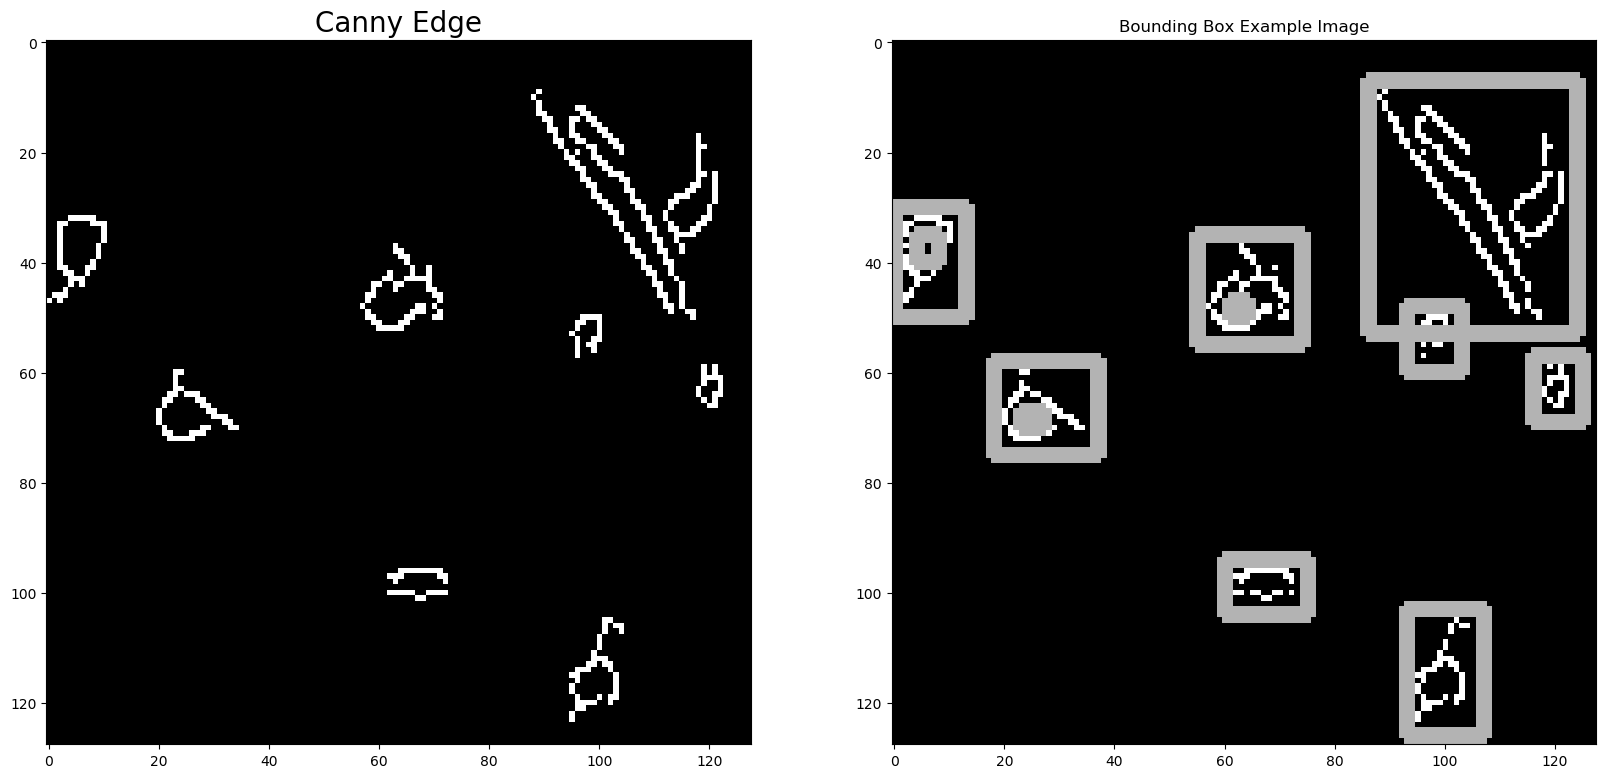

In [85]:


fig, axs = plt.subplots(1, 2)

# axs.set_prop_cycle(monochrome)
im1 = np.load("../Images/Edge/train/" +images[0])

# IPython_default = plt.rcParams.copy()
# plt.rcParams.update(IPython_default);
# plt.rcParams.update(plt.rcParamsDefault)
axs[0].set_title("Canny Edge", fontsize=40)
axs[0].imshow(im1)
axs[1].set_title("Bounding Box Example Image", , fontsize=40)
axs[1].imshow(im)

plt.rc('image', cmap='gray')
plt.rcParams["figure.figsize"] = (20,10)

# print(im[])




In [41]:
df_canny

,File Name,Number of Events,Duration of Events,Frequency Change of Events
0,cortex_4400_4912__720_1232_110_538.npy,11,"[14, 15, 19, 4, 9, 10, 19, 3, 13, 4, 38]",[]
1,striatum_3550_4062__320_832__110_349.npy,7,"[11, 13, 39, 10, 16, 39, 3]",[]
2,cortex_4400_4912__720_1232_110_262.npy,14,"[16, 8, 13, 3, 3, 50, 7, 3, 23, 28, 5, 15, 5, 16]",[]
3,striatum_3550_4062__320_832__110_361.npy,10,"[11, 45, 73, 5, 3, 4, 10, 15, 3, 25]",[]
4,striatum_3550_4062__320_832__110_407.npy,19,"[14, 5, 9, 13, 5, 9, 17, 20, 9, 29, 34, 14, 5,...",[]
...,...,...,...,...
256,cortex_4400_4912__720_1232_110_7.npy,10,"[18, 14, 11, 18, 18, 14, 8, 7, 9, 10]",[]
257,striatum_3550_4062__320_832__159_53.npy,12,"[5, 9, 10, 9, 11, 15, 32, 4, 9, 11, 19, 25]",[]
258,striatum_3550_4062__320_832__159_960.npy,19,"[24, 3, 21, 30, 10, 16, 13, 3, 18, 12, 11, 8, ...",[]
259,striatum_3550_4062__320_832__110_612.npy,15,"[15, 7, 8, 39, 3, 9, 3, 3, 18, 3, 19, 15, 12, ...",[]
